### Importação das bibliotecas

<b>Pandas</b> - Manipulação e Análise de Bases de Dados 

<b>Numpy</b> - Computação numérica

<b>Seaborn</b> - Plotagem de Gráficos e Visualização de Dados

<b>Matplotlib</b> - Configuração do ambiente de plotagem de gráficos

<b>Scipy</b> - Função para cálculo de métrica de relação de atributos
    
<b>OLS</b> - Modelo Ordinary Least Squares para cálculo e análise da métrica P-value

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as ss
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
# Configurando o tamanho da fonte dos gráficos a serem plotados
font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

A biblioteca de geração de modelos inteligentes baseados em Aprendizado de Máquina foi a Scikit-learn, por oferecer uma ampla gama de ferramentas para treinamento, avaliação dos modelos e pré-processamento dos dados de forma facilitada.

<b>LinearRegression</b> - Regressor Linear para criação de um Baseline 

<b>sklearn.metrics</b>  - Métricas de avaliação de modelo MAE, MSE e R2

<b>KFold</b>            - Método de treinamento e avaliação dos modelos

<b>LabelEncoder</b>     - Método de Pré-processamento de variáveis categóricas

<b>sqrt</b>             - Função do cálculo da Raiz Quadrada para geração da métrica RMSE

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

from math import sqrt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
COUNTPLOT_X = 13
COUNTPLOT_Y = 3
def plot_countplots(cat_index, dataframe, graph_x= COUNTPLOT_X, graph_y= COUNTPLOT_Y):
    
    fig, ax = plt.subplots(graph_x, graph_y, figsize=(20,160))
    fig_x = 0
    fig_y = 0

    for i in cat_index:
        b = sns.countplot(x=df.loc[:, i], 
                        data=df, 
                        color='gray', 
                        ax=ax[fig_x][fig_y])

        b.set_xlabel(i, fontsize=20)
        b.set_xticklabels(b.get_xticklabels(), rotation=45)

        fig_x = (fig_x + 1) % graph_x
        if(fig_x == 0):
            fig_y = (fig_y + 1) % graph_y

In [6]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [7]:
def train_baseline(df):
    # Criando um novo DataFrame sem os exemplos com dados faltantes para treinamento do modelo baseline
    df_train = df.dropna()  

    # Verificando os atributos categóricos para transformação
    is_category = df_train.dtypes == 'object'
    cat_index = df_train.columns[is_category]

    # Transformação das colunas categóricas
    for cat in cat_index:
        df_train.loc[:, cat] = LabelEncoder().fit_transform(df_train.loc[:, cat])

    # Separação das variáveis preditoras e variável alvo
    X = df_train.drop('SalePrice', axis=1)   
    y = df_train['SalePrice'].values

    # Treinamento do modelo baseline
    kf = KFold(n_splits=10)

    kf.get_n_splits(X)

    mae = []
    rmse = []
    r2 = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)

        mae.append(mean_absolute_error(y_test, y_pred))
        rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
        r2.append(r2_score(y_test, y_pred))

    print('A média da métrica MAE foi de {}'.format(round(np.mean(mae), 2)))
    print('A média da métrica RMSE foi de {}'.format(round(np.mean(rmse), 2)))
    print('A média da métrica R2 foi de {}'.format(round(np.mean(r2), 4)))

### Análise gráfica dos atributos categóricos

Carregando base de dados sem as colunas que possuem mais de 10% da amostra total com dados faltantes

In [8]:
df = pd.read_csv('dataset/train_with_nan.csv',index_col='Id')

In [9]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [11]:
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [12]:
is_category = df.dtypes == 'object'
cat_index = df.columns[is_category]

print('Há {} atributos categóricos na base de dados.'.format(len(cat_index)))

Há 39 atributos categóricos na base de dados.


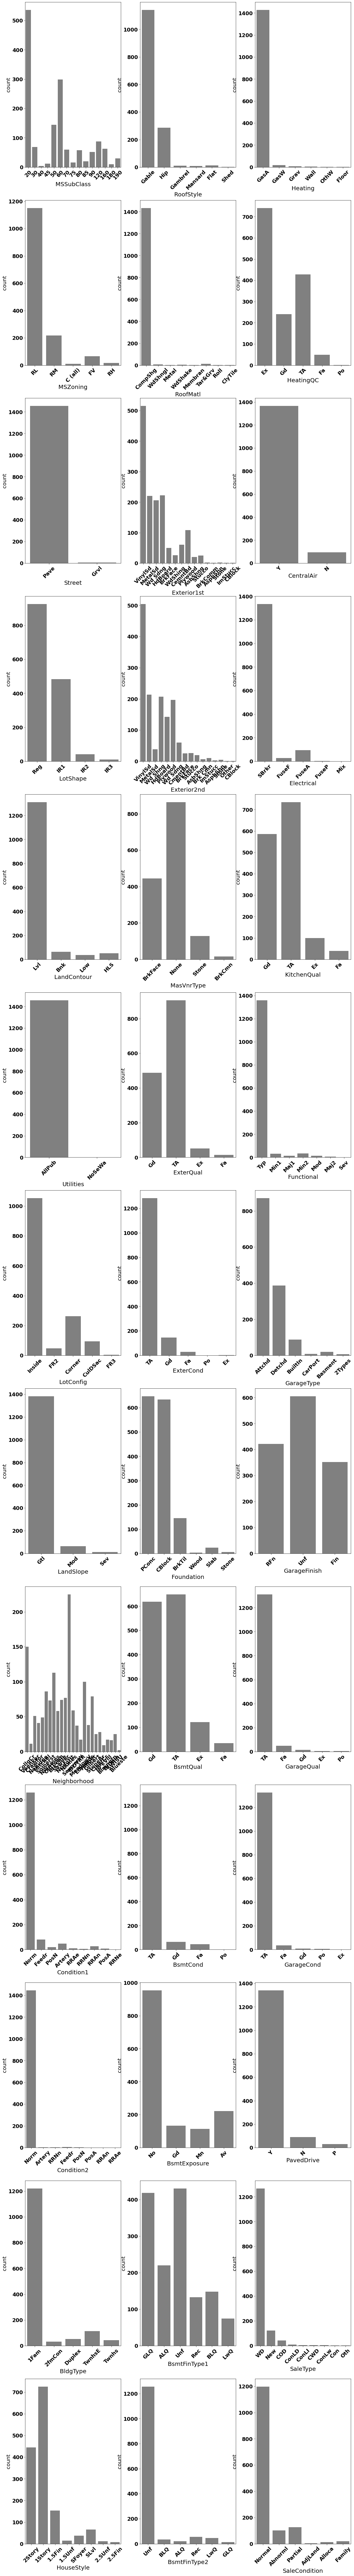

In [13]:
# Plotagem de um gráfico de caixa para entender melhor como os atributos categóricos estão distribuidos em seus valores. 
plot_countplots(cat_index, df)

In [14]:
# Verificando a distribuição dos atributos categóricos em percentual. 
for cat in cat_index:
    print(df.loc[:, cat].value_counts() / len(df) * 100)

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
NAmes      15.4109

Com a verificação acima foi possível perceber que em algumas colunas categóricas há um grande desbalanceamento entre os valores, por exemplo em MSZoning 99.59% dos dados são referentes a categoria <i>Pave</i> e portanto pode piorar a qualidade do modelo inteligente, já que este pode acabar se sobreajustando para os valores conhecidos destas categorias. Assim, será retirado todas as colunas que possuirem uma das categorias representando mais de 95% dos exemplos a fim de evitar que o modelo inteligente se sobreajuste os poucos exemplos conhecidos da categoria minoritária.

In [15]:
# Verificando quais colunas possuem categorias que representam mais de 95% dos exemplos

unbalanced_cat = []
for cat in cat_index:
    cat_percentual = (df.loc[:, cat].value_counts() / len(df)) * 100
    if(True in (i > 95 for i in cat_percentual.values)):
        unbalanced_cat.append(cat)

In [16]:
print('Há {} colunas que possuem categorias que representam mais de 95% dos exemplos, sendo estas:'.format(len(unbalanced_cat)))
for cat in unbalanced_cat:
    print('-> ', cat)

Há 5 colunas que possuem categorias que representam mais de 95% dos exemplos, sendo estas:
->  Street
->  Utilities
->  Condition2
->  RoofMatl
->  Heating


In [17]:
df_copy = df.copy()                             # Criando uma cópia da base de dados
df_copy = df_copy.drop(unbalanced_cat, axis=1)  # Removendo colunas com categorias desbalanceadas
df_copy.head()                                  # Verificando os 5 primeiros elementos da base dados

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [19]:
df_copy.to_csv('dataset/train_balanced_with_nan.csv') # Salvando a base de dados com colunas categóricas balanceadas

Mesmo com as colunas com categorias balanceadas não há garantia de que elas apresentam importância para descrever a variável alvo, assim é necessário uma métrica para verificar essa correlação e as métricas serão a <i>Cramér-V</i> e o <i>P-value</i>.

Crámers-V: É uma medida de associação entre duas variáveis, sendo pelo menos uma delas categórica, fornecendo um valor entre 0 e +1.

P-value: É a probabilidade de que eventos extremos ocorram sob a hipótese nula. Se o valor-p for menor que um determinado nível de significância α (uma escolha comum é α = 0,05), a hipótese nula será rejeitada, e um coeficiente de regressão é considerado significativo.

In [20]:
# Retirando categorias desbalanceadas da variavel que possui o nomes da categorias presentes no DataFrame
cat_index = cat_index.drop(unbalanced_cat)

In [21]:
# Calculando a estatística Crámers-V para cada uma das categorias do DataFrame
zero_cramers = []

for cat in cat_index:
    
    cat_cramers_v = cramers_v(df_copy[cat], df_copy['SalePrice'])
    if(cat_cramers_v == 0):
        zero_cramers.append(cat)
        
    print("Associação de " + str(cat) + ' com a variável alvo: ' + str(cat_cramers_v))

Associação de MSSubClass com a variável alvo: 0.0
Associação de MSZoning com a variável alvo: 0.292440561709249
Associação de LotShape com a variável alvo: 0.3240087213186113
Associação de LandContour com a variável alvo: 0.13942919066843798
Associação de LotConfig com a variável alvo: 0.14483480003541252
Associação de LandSlope com a variável alvo: 0.1480792440520463
Associação de Neighborhood com a variável alvo: 0.17032977675232583
Associação de Condition1 com a variável alvo: 0.0
Associação de BldgType com a variável alvo: 0.0
Associação de HouseStyle com a variável alvo: 0.0
Associação de RoofStyle com a variável alvo: 0.0
Associação de Exterior1st com a variável alvo: 0.0
Associação de Exterior2nd com a variável alvo: 0.0
Associação de MasVnrType com a variável alvo: 0.2676571484733272
Associação de ExterQual com a variável alvo: 0.44418679896862595
Associação de ExterCond com a variável alvo: 0.3053512909406099
Associação de Foundation com a variável alvo: 0.2214989220254282
Ass

In [22]:
print('Os atributos categóricos que possuem uma estatística Crámers-V de 0 são: ')
for cat in zero_cramers:
    print('-> ', cat)

Os atributos categóricos que possuem uma estatística Crámers-V de 0 são: 
->  MSSubClass
->  Condition1
->  BldgType
->  HouseStyle
->  RoofStyle
->  Exterior1st
->  Exterior2nd
->  BsmtFinType1
->  BsmtFinType2
->  HeatingQC
->  Functional
->  GarageCond
->  PavedDrive


Para não correr o risco de o modelo acabar perdendo informação será feita uma segunda prova da importância dos atributos a partir da métrica P-value.

In [23]:
# Criação de um modelo OLS apenas com os atributos categóricos que apresentaram o valor da métrica Crámers-V igual a 0
formula = 'SalePrice ~ ' + ' + '.join(zero_cramers)
model_ols = ols(formula, data = df_copy).fit()

In [24]:
# Verificando quais dos atributos categóricos possui a métrica P-value inferior a 0.05
low_p_index = [index[:index.find('[')] for low_p, index in zip(model_ols.pvalues, model_ols.pvalues.index) 
                                               if low_p < 0.05]

low_p_index = low_p_index[1:]                     # O modelo OLS cria uma variável extra (Intercept) que fica na primeira posição, como ela não faz parte da lista de atributos da base de dados real deve ser retirada
low_p_index = list(dict.fromkeys(low_p_index))    # O modelo OLS calcula o P-value para cada valor presente no atributo categórico, portanto é necessário remover possíveis atributos duplicados
print('Os atributos que apresentaram um baixo P-value foram:')
for cat in low_p_index:
    print('-> ', cat)

Os atributos que apresentaram um baixo P-value foram:
->  MSSubClass
->  HouseStyle
->  Exterior1st
->  BsmtFinType1
->  BsmtFinType2
->  HeatingQC
->  PavedDrive


In [25]:
cat_remove = []
for cat in zero_cramers:
    if not(cat in low_p_index):
        cat_remove.append(cat)
cat_remove

['Condition1',
 'BldgType',
 'RoofStyle',
 'Exterior2nd',
 'Functional',
 'GarageCond']

In [26]:
# Criando um novo DataFrame sem as categorias que apresentaram métrica Crámers-V de 0 e alto P-value
df_cp_cat_clean = df_copy.drop(cat_remove, axis=1) 

In [27]:
df_cp_cat_clean.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,2Story,7,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Story,6,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,2Story,7,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,2Story,7,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,2Story,8,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
df_cp_cat_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  Exterior1st    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

In [29]:
# Salvando DataFrame sem os atributos categóricos que apresentaram métrica Crámers-V de 0 e alto P-value
df_cp_cat_clean.to_csv('dataset/train_cat_clean.csv') 

In [30]:
train_baseline(df_cp_cat_clean)

A média da métrica MAE foi de 20552.55
A média da métrica RMSE foi de 34081.25
A média da métrica R2 foi de 0.7949


O modelo baseline obteve resultados similares ao apresentados anteriormente, portanto não houve perda ou ganho de informação notável durante a eliminação das variáveis ao decorrer desta análise, no entanto, um modelo que utiliza de menos atributos mesmo que apresente métrica similar é mais eficiente, por seu tempo de processamento e complexidade serem menores.